# Loan status Predictions

In [51]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

## Decription of the columns in the dataset

The dataset is composed by 32581 rows (observations) and 12 columns (variables).

- person_age: is the age of the person at the time of the loan.

- person_income: is the yearly income of the person at the time of the loan.

- person_home_ownership: is the type of ownership of the home.

- person_emp_length: is the amount of time in years that person is employed.

- loan_intent: is the aim of the loan.

- loan_grade: is a classification system that involves assigning a quality score to a loan based on a borrower's credit history, quality of the 
collateral, and the likelihood of repayment of the principal and interest.

- loan_amnt: is the dimension of the loan taken.

- loan_int_rate: is the interest paid for the loan.

- loan_status: is a dummy variable where 1 is default, 0 is not default.

- loan_percent_income: is the ratio between the loan taken and the annual income.

- cb_person_default_on_file: answers whether the person has defaulted before.

- cb_person_cred_hist_length: represents the number of years of personal history since the first loan taken from that person.

## Data Preprocessing

In [2]:
df = pd.read_csv("credit_risk_dataset.csv")

In [3]:
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [5]:
df["person_emp_length"].head(20)

0     123.0
1       5.0
2       1.0
3       4.0
4       8.0
5       2.0
6       8.0
7       5.0
8       8.0
9       6.0
10      6.0
11      2.0
12      2.0
13      4.0
14      2.0
15      7.0
16      0.0
17      7.0
18      8.0
19      8.0
Name: person_emp_length, dtype: float64

In [6]:
median_emp_length = df["person_emp_length"].median()
mode_emp_length = df["person_emp_length"].mode()
print(median_emp_length)
print(mode_emp_length)

4.0
0    0.0
Name: person_emp_length, dtype: float64


In [7]:
df["person_emp_length"] = df["person_emp_length"].fillna(median_emp_length)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [9]:
df[["loan_amnt","loan_int_rate", "loan_grade"]].head(20)

,loan_amnt,loan_int_rate,loan_grade
0,35000,16.02,D
1,1000,11.14,B
2,5500,12.87,C
3,35000,15.23,C
4,35000,14.27,C
5,2500,7.14,A
6,35000,12.42,B
7,35000,11.11,B
8,35000,8.90,A
9,1600,14.74,D


In [10]:
number_of_columns_above_the_mean = df[df["loan_int_rate"] > 11.01].count()
number_of_columns_above_the_mean

person_age                    14545
person_income                 14545
person_home_ownership         14545
person_emp_length             14545
loan_intent                   14545
loan_grade                    14545
loan_amnt                     14545
loan_int_rate                 14545
loan_status                   14545
loan_percent_income           14545
cb_person_default_on_file     14545
cb_person_cred_hist_length    14545
dtype: int64

In [11]:
number_of_columns_below_the_mean = df[df["loan_int_rate"] < 11.01].count()
number_of_columns_below_the_mean

person_age                    14920
person_income                 14920
person_home_ownership         14920
person_emp_length             14920
loan_intent                   14920
loan_grade                    14920
loan_amnt                     14920
loan_int_rate                 14920
loan_status                   14920
loan_percent_income           14920
cb_person_default_on_file     14920
cb_person_cred_hist_length    14920
dtype: int64

In [12]:
df["loan_int_rate"] = df["loan_int_rate"].fillna(df["loan_int_rate"].mean())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           32581 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               32581 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [14]:
# selecting our dependent and independent features
X = df.drop(["loan_status"], axis=1)
y = df["loan_status"]


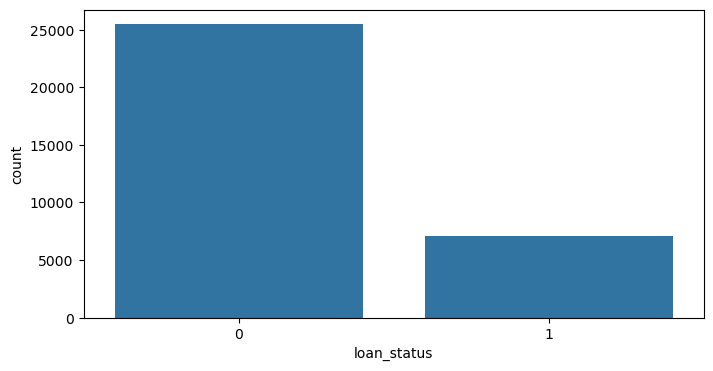

In [15]:
# A plot to show the distribution of the two classes in our target variable

plt.figure(figsize = (8,4))
sns.countplot(x = "loan_status", data = df)
plt.show()

In [16]:
Counter(y)

Counter({0: 25473, 1: 7108})

In [17]:
# change categorical data to numerical using enconding
df_dummy = pd.get_dummies(df, drop_first=True, dtype=int)
df_dummy.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,22,59000,123.0,35000,16.02,1,0.59,3,0,0,...,0,1,0,0,0,1,0,0,0,1
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0,0,0,1,0,0,0,0,0,0
2,25,9600,1.0,5500,12.87,1,0.57,3,0,0,...,1,0,0,0,1,0,0,0,0,0
3,23,65500,4.0,35000,15.23,1,0.53,2,0,0,...,1,0,0,0,1,0,0,0,0,0
4,24,54400,8.0,35000,14.27,1,0.55,4,0,0,...,1,0,0,0,1,0,0,0,0,1


In [18]:
X_dummy = df_dummy.drop("loan_status", axis=1)
y_dummy = df_dummy["loan_status"]

In [19]:
# instantiate smote

oversampling = SMOTE(random_state=42)


In [20]:
# Handle imbalance by re-sampling
X_over, y_over = oversampling.fit_resample(X_dummy, y_dummy)

In [21]:
# let use counter to check the new number of y_over
Counter(y_over)

Counter({1: 25473, 0: 25473})

In [61]:
# fit our independent variables to scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_over)

In [62]:
# split to train and test set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_over, test_size=0.2, random_state=42)

In [63]:
# initialize the Logistic regression model
lr = LogisticRegression()

In [64]:
# Fit the logistic Regression Model
lr.fit(X_train, y_train)

LogisticRegression()

In [65]:
# Get the prediction of the model from the test set
y_pred = lr.predict(X_test)

In [66]:
# print the confusion matrix, precision, recall, F1, classification report
c_matrix = confusion_matrix(y_pred, y_test)
precision = precision_score(y_pred, y_test)
recall = recall_score(y_pred, y_test)
f1 = f1_score(y_pred, y_test)
c_report = classification_report(y_pred, y_test)

print(c_matrix)
print(precision)
print(recall)
print(f1)
print(c_report)

[[4475  786]
 [ 619 4310]]
0.8457613814756672
0.8744167173868939
0.8598503740648379
              precision    recall  f1-score   support

           0       0.88      0.85      0.86      5261
           1       0.85      0.87      0.86      4929

    accuracy                           0.86     10190
   macro avg       0.86      0.86      0.86     10190
weighted avg       0.86      0.86      0.86     10190



## Insight form the classification report
**Class 0 (negative class):**

- Precision = `0.79`: Out of all predicted negatives, `79%` were correct.
- Recall = `0.82`: The model correctly identified `82%` of the actual negatives.
- F1-Score = `0.81`: A balance between precision and recall.
- Support = `5094`: There were `5094` actual negatives in the dataset.

**Class 1 (positive class):**

- Precision = `0.82`: Out of all predicted positives, `82%` were correct.
- Recall = `0.79`: The model correctly identified `79%` of the actual positives.
- F1-Score = `0.80`: A balance between precision and recall.
- Support = `5096`: There were `5096` actual positives in the dataset.

#### Overall Metrics

**Accuracy** = `0.81`: The model correctly classified `81%` of all instances.

Accuracy = `Correct Predictions/Total Predictions`

 
#### Macro Average

Averages the precision, recall, and F1-score across classes equally, giving each class the same weight.

In this case, Precision = Recall = F1 = `0.81`.
#### Weighted Average:

Averages the metrics but gives more weight to classes with more instances (based on `support`).

Here, it matches the macro average because both classes have roughly equal support.
### Key Insights
**Balanced Performance:** The precision, recall, and F1-scores are similar for both classes, indicating balanced performance.

**Good Overall Accuracy:** With 81% accuracy, the model performs well but has room for improvement.

**Trade-offs:** There’s a slight trade-off between precision and recall for both classes. For example, the model is slightly better at avoiding false negatives for class 0 and false positives for class 1.

## Next Steps: Improving Accuracy with Support Vector Machines (SVM)
To further enhance the model's performance and accuracy, the next logical step is to experiment with Support Vector Machines (SVM). SVMs are powerful algorithms, especially for binary classification problems, as they aim to find the optimal hyperplane that best separates the data into classes.

#### Why Use SVM?
- Effective in High Dimensional Spaces: SVM performs well even when the number of features is greater than the number of samples.
- Robust to Outliers: By using kernels and soft margins, SVM can handle outliers and still create a reliable decision boundary.
- Flexibility with Kernels: SVM can utilize linear or non-linear kernels (e.g., RBF, polynomial), allowing it to capture complex relationships in data.
- Focus on Support Vectors: Instead of focusing on all the data points, SVM focuses on the critical data points (support vectors), which define the decision boundary.
  
Lets Implement building a model using SVC.

In [67]:
# Next lets intilaze the support vector classifier
svm = SVC()

In [68]:
# Fit the support vector classifier
svm.fit(X_train, y_train)

SVC()

In [69]:
# Get the prediction of the support vector classifier from the test set
y_pred_svm = svm.predict(X_test)

In [70]:
# Print the classification report
cl_report = classification_report(y_test, y_pred_svm)
print(cl_report)

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      5094
           1       0.94      0.86      0.90      5096

    accuracy                           0.91     10190
   macro avg       0.91      0.91      0.91     10190
weighted avg       0.91      0.91      0.91     10190



# Conclusion
In this notebook, we developed and evaluated a robust classification model to address the given problem statement. Here's a summary of the steps and key outcomes:

### Data Preparation
We began by cleaning the dataset, handling class imbalances using SMOTE, and scaling the features to ensure compatibility with both the Logistic Regression and SVM model.

### Model Selection and Training
After evaluating accuracy, SVM classifier to achieve higher accuracy. The SVM model demonstrated strong performance with an overall accuracy of 92%, and a balanced precision-recall score, highlighting its ability to generalize well across both classes.

